In [2]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np  # Wichtig für np.random.choice!
import seaborn as sns

In [18]:
# Prüfung: Vergleich alte und neue CSV-Datei
# Alte Datei
df_old = pd.read_csv("output/pm_bvg_wordcount.csv")  

# Neue bereinigte Datei
df_new = pd.read_csv("output/wordcount_pm_clean.csv")

In [19]:
# Top 10 alte Wortzählung
print("Top 10 alte Wortzählung:")
top_raw = (
    df_old.groupby("word")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_raw)

# Top 10 neue, bereinigte Wortzählung
print("\nTop 10 bereinigte Wortzählung:")
top_clean = (
    df_new.groupby("word")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_clean)

# Ausgabe nochmal gesammelt
print("\nTop 10 Wörter vor Bereinigung:\n", top_raw)
print("\nTop 10 Wörter nach Bereinigung:\n", top_clean)

Top 10 alte Wortzählung:
word
bvg                     6693
berliner                1497
service                 1424
startseite              1397
pressemitteilungen      1395
cookie-einstellungen    1395
werden.                 1191
informationen           1020
2025                     992
tickets                  946
Name: count, dtype: int64

Top 10 bereinigte Wortzählung:
word
bvg                 1159
berliner             520
berlin               309
linie                297
fahrgäste            284
uhr                  261
straße               231
verkehrsbetriebe     211
u-bahnhof            197
werden.              183
Name: count, dtype: int64

Top 10 Wörter vor Bereinigung:
 word
bvg                     6693
berliner                1497
service                 1424
startseite              1397
pressemitteilungen      1395
cookie-einstellungen    1395
werden.                 1191
informationen           1020
2025                     992
tickets                  946
Name: count, 

In [20]:
df_new.head()

,word,count,source,date,year
0,…marzahn-hellersdorf!,1,bvg_pm,2021-08-06,2021
1,punkte,1,bvg_pm,2021-08-06,2021
2,berliner*innen,1,bvg_pm,2021-08-06,2021
3,bezirk,2,bvg_pm,2021-08-06,2021
4,musikalische,1,bvg_pm,2021-08-06,2021


In [21]:
df_new["year"].value_counts().sort_index()

year
2021    13934
2022    15172
2023    10863
2024     9257
2025     2806
Name: count, dtype: int64

In [22]:
# Prüfung fehlende Werte
df_new.isnull().sum()

word      0
count     0
source    0
date      0
year      0
dtype: int64

In [23]:
# Prüfung Datentypen
df_new.dtypes

word      object
count      int64
source    object
date      object
year       int64
dtype: object

In [24]:
# Prüfung
print("Fehlende Werte:")
print(df_new[["year", "word", "count"]].isnull().sum())

print("\nDatentypen:")
print(df_new.dtypes)

Fehlende Werte:
year     0
word     0
count    0
dtype: int64

Datentypen:
word      object
count      int64
source    object
date      object
year       int64
dtype: object


In [35]:
# Top-Wörter
df_new_top = (
    df_new.groupby("word")["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10)
)

print(df_new_top)

               word  count
0               bvg   1159
1          berliner    520
2            berlin    309
3             linie    297
4         fahrgäste    284
5               uhr    261
6            straße    231
7  verkehrsbetriebe    211
8         u-bahnhof    197
9           werden.    183


In [36]:
# Wordcloud
# Vorbereitung 
# Für die Analyse nicht relevante Wörter ausschließen
# Monats- und Wochentagsfilter
monate = ["januar", "februar", "märz", "april", "mai", "juni", "juli", "august", "september", "oktober", "november", "dezember"]
wochentage = ["montag", "dienstag", "mittwoch", "donnerstag", "freitag", "samstag", "sonntag"]
jahre = ["2021", "2022", "2023", "2024", "2025"]

ausschluss_wörter = set(monate + wochentage + jahre)

# Filter anwenden
filtered_data = df_new[
    ~df_new["word"].str.lower().str.replace(r"[^\wäöüß]", "", regex=True).isin(ausschluss_wörter)
    & ~df_new["word"].str.fullmatch(r"\d+")
]

In [37]:
# Wordcloud
# Vorbereitung 
# Farben: BVG-Farbpalette
# Farben nach Top-Words
color_map = {
    "1-10": "#FDD722",   # Gelb
    "11-20": "#989B9A",  # Verkehrs-Grau A
    "21-30": "#595B62",  # Schiefergrau
    "31-50": "#252525",  # Schwarz
}

In [38]:
# Wordcloud
# Vorbereitung 
# Wortfrequenzen berechnen
word_freq = filtered_data.groupby("word")["count"].sum().to_dict()

# Top 50 Wörter sortieren
top_words_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
word_to_color = {}

for i, (word, _) in enumerate(top_words_sorted):
    if i < 10:
        word_to_color[word] = color_map["1-10"]
    elif i < 20:
        word_to_color[word] = color_map["11-20"]
    elif i < 30:
        word_to_color[word] = color_map["21-30"]
    elif i < 50:
        word_to_color[word] = color_map["31-50"]

# Weitere Farben für übrige Wörter 
fallback_colors = ["#BFBFBF", "#DADADA", "#EAEAEA"]

# Funktion für Farbauswahl
def color_func(word, **kwargs):
    return word_to_color.get(word, np.random.choice(fallback_colors))

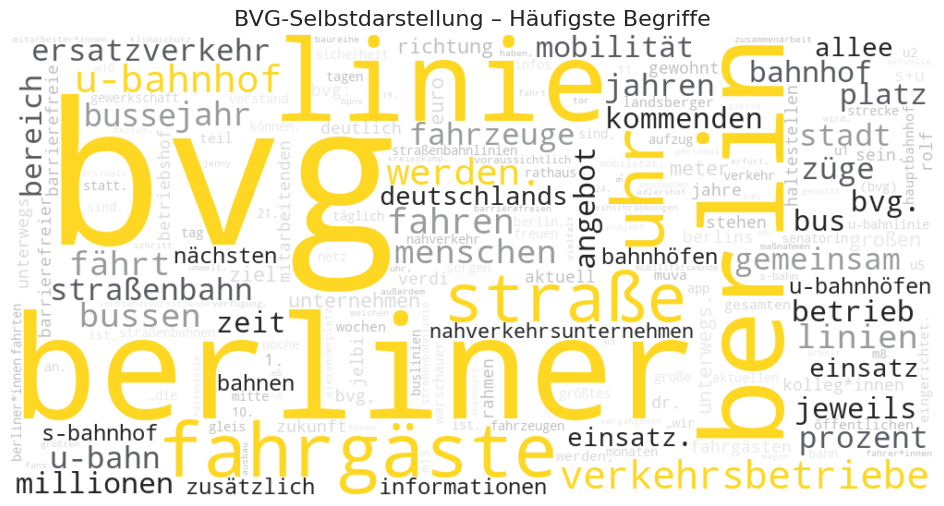

In [39]:
# Wordcloud erstellen
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    color_func=color_func
).generate_from_frequencies(word_freq)

# Anzeige
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("BVG-Selbstdarstellung – Häufigste Begriffe", fontsize=16, color="#252525")
plt.show()

In [40]:
# Top Wörter nach Jahren
# Gruppieren
top_words_by_year = (
    filtered_data.groupby(["year", "word"])["count"]
    .sum()
    .reset_index()
)

# Top 10 pro Jahr ausgeben
for year in sorted(top_words_by_year["year"].dropna().unique()):
    print(f"\nTop-Wörter im Jahr {int(year)}:")
    top_words = (
        top_words_by_year[top_words_by_year["year"] == year]
        .sort_values("count", ascending=False)
        .head(10)
    )
    print(top_words[["word", "count"]].to_string(index=False))


Top-Wörter im Jahr 2021:
            word  count
             bvg    218
        berliner    155
           linie    112
             uhr    101
          straße     92
          berlin     74
       u-bahnhof     72
       fahrgäste     70
verkehrsbetriebe     64
          bussen     61

Top-Wörter im Jahr 2022:
            word  count
             bvg    299
        berliner    164
           linie    114
          straße     94
             uhr     91
       u-bahnhof     78
verkehrsbetriebe     75
          berlin     74
       fahrgäste     74
          fahren     69

Top-Wörter im Jahr 2023:
            word  count
             bvg    237
        berliner     89
          berlin     60
       fahrgäste     48
             uhr     47
          straße     43
           linie     43
          fahren     39
         werden.     39
verkehrsbetriebe     37

Top-Wörter im Jahr 2024:
     word  count
      bvg    254
 berliner     86
   berlin     80
fahrgäste     59
 menschen     44
  

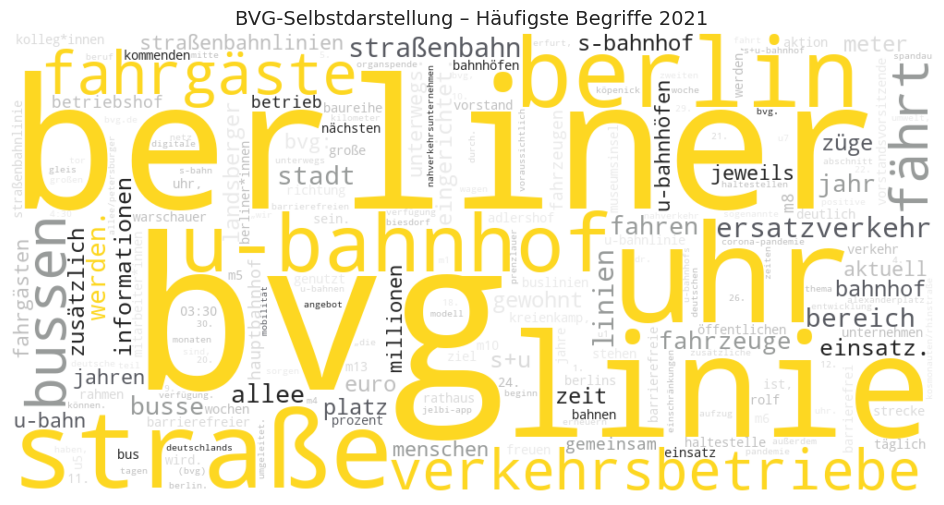

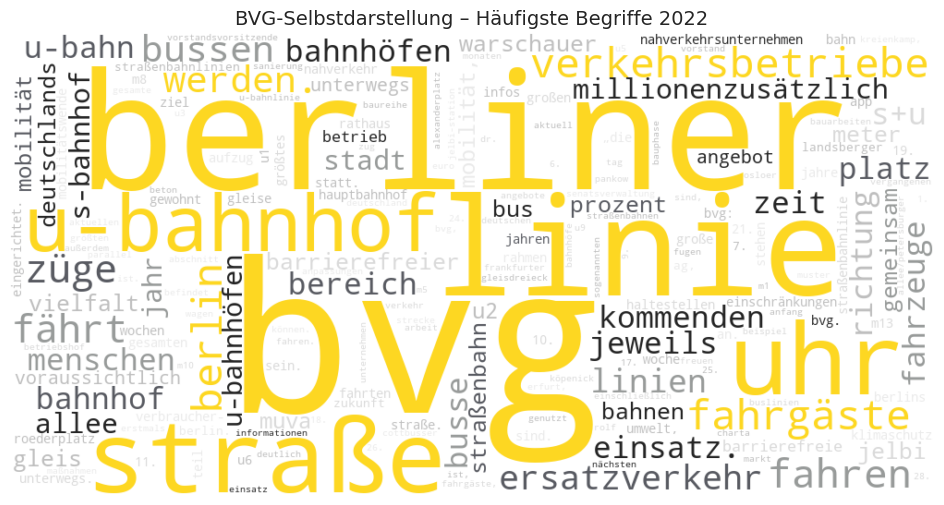

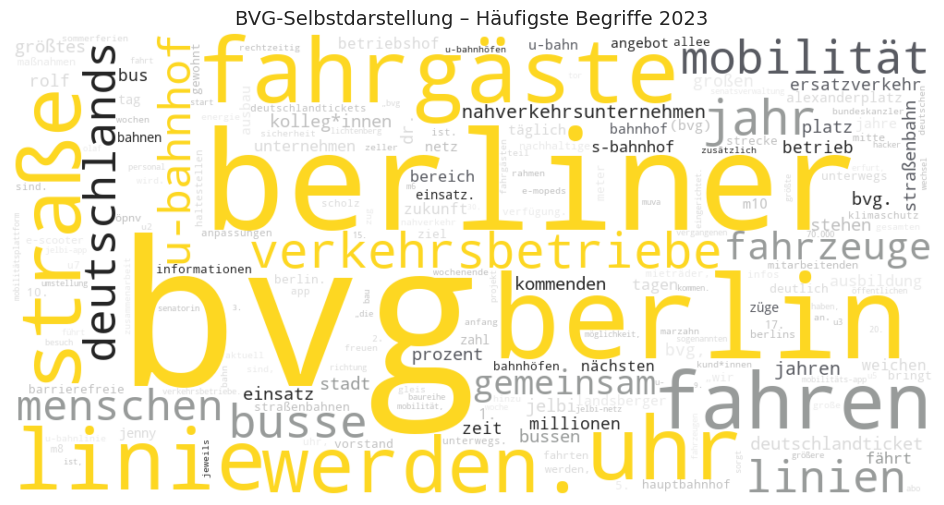

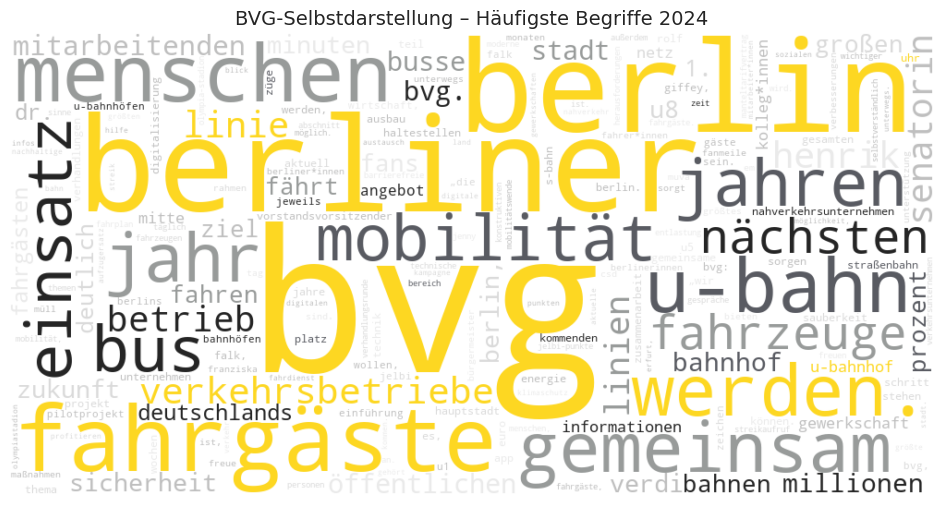

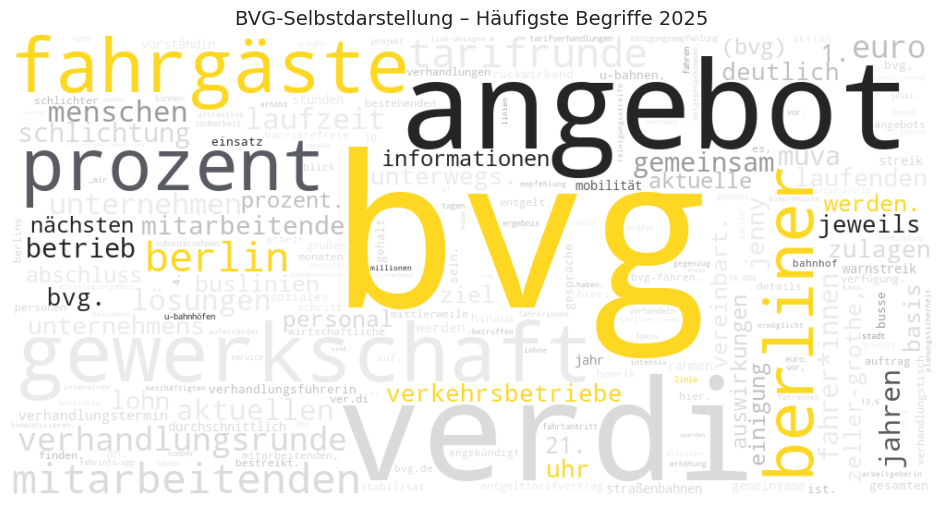

In [41]:
# Alle Jahre im Datensatz 
years = sorted(filtered_data["year"].unique())

# Wordcloud je Jahr
for year in years:
    year_data = filtered_data[filtered_data["year"] == year]  
    word_freq = year_data.groupby("word")["count"].sum().to_dict()

    wc = WordCloud(
        width=1000,
        height=500,
        background_color="white",
        color_func=color_func
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"BVG-Selbstdarstellung – Häufigste Begriffe {int(year)}", fontsize=14, color="#252525")
    plt.show()
